<a href="https://colab.research.google.com/github/ariyapooh/Dicision_tree/blob/main/dicision_tree_6406021621137.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise
ให้นักศึกษาทดลองจำแนกชุดข้อมูล bank-data.csv ด้วย decision tree
โดยให้ดำเนินการดังต่อไปนี้
1.  ดูข้อมูลและรายละเอียดของข้อมูลทั้งหมด หา outlier ถ้ามี outlier ให้จัดการก่อน
2. ลบattribute ที่ไม่จำเป็นออก
3.  จำแนกข้อมูลโดยให้ได้ค่าประสิทธิภาพสูงที่สุด โดยแสดงค่าทั้ง accuracy precision recall f-measure  และสร้าง model
4.  วาดต้นไม้และกฎที่ได้จากการเรียนรู้
5.  ทดลองสร้าง unseen data ขึ้นมาสัก 3 รายการแล้วนำไปจำแนกข้อมูลด้วย model ที่มีค่าสูงที่สุดที่ได้



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os # use commandline
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['bank-data.csv']))

Saving bank-data.csv to bank-data.csv


In [ ]:
data.head(10)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
5,ID12106,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO,YES
6,ID12107,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,NO,YES
7,ID12108,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,NO,NO
8,ID12109,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,NO,NO
9,ID12110,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO,NO


In [ ]:
data['income']

0      17546.00
1      30085.10
2      16575.40
3      20375.40
4      50576.30
         ...   
595    47025.00
596     9672.25
597    15976.30
598    14711.80
599    26671.60
Name: income, Length: 600, dtype: float64

In [ ]:
from scipy.stats.mstats import winsorize
df_area_mean_win = winsorize(data['income'],(0.1, 0.1))
df_area_mean_win

masked_array(data=[17546. , 30085.1, 16575.4, 20375.4, 47198.6, 37869.6,
                   12644.9, 24946.6, 25304.3, 24212.1, 47198.6, 26658.8,
                   15735.8, 47198.6, 19474.6, 22342.1, 17729.8, 41016. ,
                   26909.2, 22522.8, 47198.6, 16497.3, 38446.6, 15538.8,
                   12644.9, 41034. , 20809.7, 20114. , 29359.1, 24270.1,
                   22942.9, 16325.8, 23443.2, 29921.3, 37521.9, 19868. ,
                   12644.9, 13381. , 18504.3, 25391.5, 26774.2, 26952.6,
                   47198.6, 27571.5, 13740. , 47198.6, 13283.9, 13106.6,
                   39547.8, 17867.3, 14309.7, 23894.8, 16259.7, 29794.1,
                   47198.6, 47198.6, 24977.5, 23124.9, 15143.8, 25334.3,
                   24763.3, 36589. , 27022.6, 12644.9, 12644.9, 17390.1,
                   12644.9, 34892.9, 19403.1, 12644.9, 14064.9, 12644.9,
                   31982. , 23197.5, 47198.6, 35610.5, 26948. , 47198.6,
                   14724.5, 34524.9, 22052.1, 27808

In [ ]:
data.drop(columns=['id'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = data.copy()

label_columns = ['sex', 'region','married', 'car', 'save_act', 'current_act', 'mortgage']
encoder = LabelEncoder()
for column in label_columns:
    df[column] = encoder.fit_transform(df[column])
df

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,0,0,17546.00,0,1,0,0,0,0,YES
1,40,1,3,30085.10,1,3,1,0,1,1,NO
2,51,0,0,16575.40,1,0,1,1,1,0,NO
3,23,0,3,20375.40,1,3,0,0,1,0,NO
4,57,0,1,50576.30,1,0,0,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,61,0,0,47025.00,0,2,1,1,1,1,NO
596,30,0,0,9672.25,1,0,1,1,1,0,NO
597,31,0,3,15976.30,1,0,1,1,0,0,YES
598,29,1,0,14711.80,1,0,0,1,0,1,NO


In [ ]:
# Reading the Iris.csv file
X = df.iloc[:,0:10].values
y = df.iloc[:,10].values # attribute 10 is label data

In [ ]:
# Import Library for splitting data
from collections import Counter
from sklearn.model_selection import train_test_split
# Creating Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(450, 10) (150, 10) (450,) (150,)
Counter({'NO': 235, 'YES': 215})
Counter({'NO': 91, 'YES': 59})


In [ ]:
# Creating Decision Tree Classifier
# see https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() #Gini Index
clf.fit(X_train,y_train) #learning model

# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8066666666666666


In [ ]:
#show confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[76 15]
 [14 45]]


In [ ]:
#Measures of the predicted values
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          NO       0.84      0.84      0.84        91
         YES       0.75      0.76      0.76        59

    accuracy                           0.81       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.81      0.81      0.81       150



[Text(0.7626201923076923, 0.9615384615384616, 'x[3] <= 51291.801\ngini = 0.499\nsamples = 450\nvalue = [235, 215]'),
 Text(0.5637019230769231, 0.8846153846153846, 'x[5] <= 1.5\ngini = 0.495\nsamples = 419\nvalue = [230, 189]'),
 Text(0.3261217948717949, 0.8076923076923077, 'x[5] <= 0.5\ngini = 0.498\nsamples = 275\nvalue = [128, 147]'),
 Text(0.15865384615384615, 0.7307692307692307, 'x[4] <= 0.5\ngini = 0.475\nsamples = 178\nvalue = [109, 69]'),
 Text(0.0641025641025641, 0.6538461538461539, 'x[9] <= 0.5\ngini = 0.437\nsamples = 62\nvalue = [20, 42]'),
 Text(0.038461538461538464, 0.5769230769230769, 'x[3] <= 16479.6\ngini = 0.111\nsamples = 34\nvalue = [2, 32]'),
 Text(0.02564102564102564, 0.5, 'x[0] <= 32.5\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.01282051282051282, 0.4230769230769231, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.038461538461538464, 0.4230769230769231, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.05128205128205128, 0.5, 'gini = 0.0\nsampl

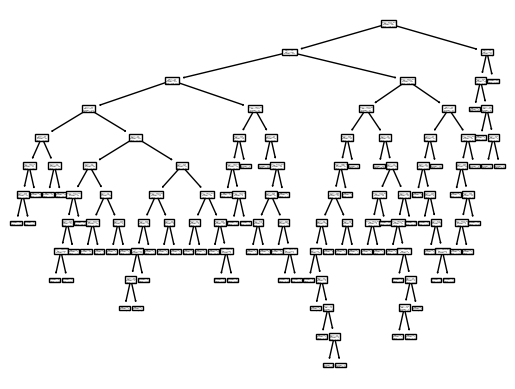

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
#use Entropy
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3) #set max_depth = 3
clf.fit(X_train,y_train)

# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.7422222222222222
Test data accuracy: 0.7666666666666667


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[79 12]
 [23 36]]


[Text(0.5769230769230769, 0.875, 'x[3] <= 51291.801\nentropy = 0.999\nsamples = 450\nvalue = [235, 215]'),
 Text(0.3076923076923077, 0.625, 'x[5] <= 1.5\nentropy = 0.993\nsamples = 419\nvalue = [230, 189]'),
 Text(0.15384615384615385, 0.375, 'x[5] <= 0.5\nentropy = 0.997\nsamples = 275\nvalue = [128, 147]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.963\nsamples = 178\nvalue = [109, 69]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.714\nsamples = 97\nvalue = [19, 78]'),
 Text(0.46153846153846156, 0.375, 'x[3] <= 30340.851\nentropy = 0.871\nsamples = 144\nvalue = [102, 42]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.51\nsamples = 97\nvalue = [86, 11]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.925\nsamples = 47\nvalue = [16, 31]'),
 Text(0.8461538461538461, 0.625, 'x[5] <= 0.5\nentropy = 0.637\nsamples = 31\nvalue = [5, 26]'),
 Text(0.7692307692307693, 0.375, 'x[4] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.65

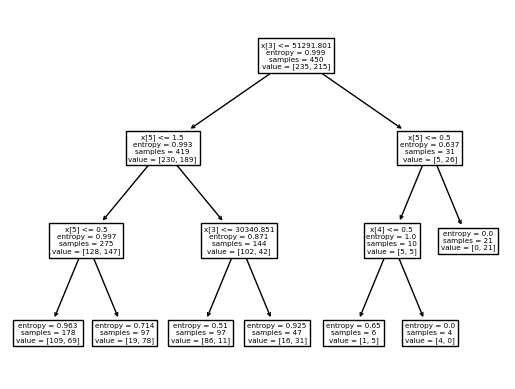

In [ ]:
# Generating the decision tree graph
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
data.head(10)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
5,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO,YES
6,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,NO,YES
7,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,NO,NO
8,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,NO,NO
9,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO,NO


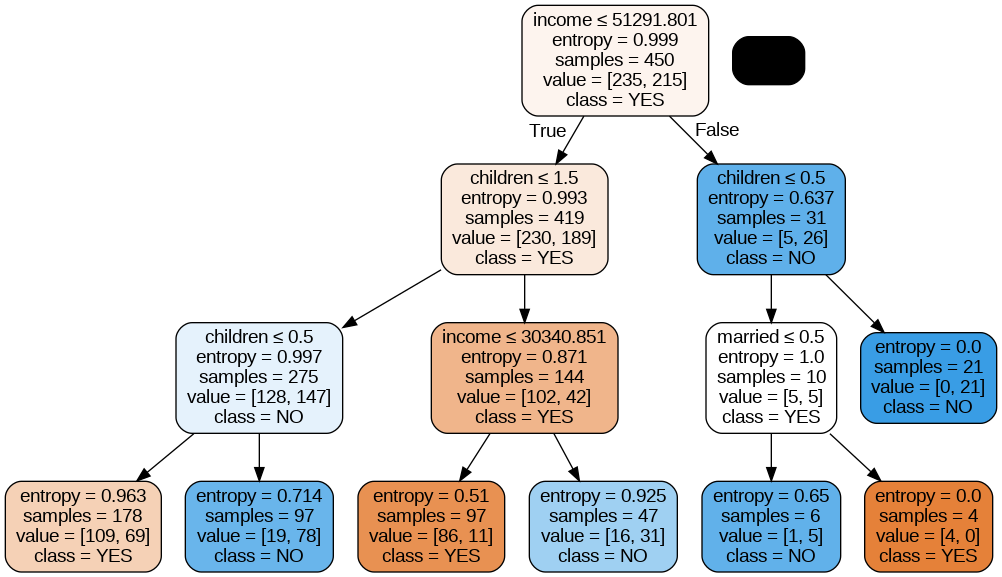

In [ ]:
#Convert decision Tree to Dot file
#export_graphviz function converts decision tree classifier into dot file
#pydotplus convert this dot file to png or displayable form on Jupyter.
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = ['age',	'sex',	'region',	'income', 'married',	'children',	'car',	'save_act',	'current_act',	'mortgage']
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['YES','NO'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bankdata.png')
Image(graph.create_png())
#Values are number of instances per class.

In [ ]:
from sklearn.tree import export_text
clf = DecisionTreeClassifier(random_state=0)
decision_tree = clf.fit(X_train,y_train)
rules = export_text(decision_tree, feature_names=feature_cols)
print(rules)

|--- income <= 51291.80
|   |--- children <= 1.50
|   |   |--- children <= 0.50
|   |   |   |--- married <= 0.50
|   |   |   |   |--- mortgage <= 0.50
|   |   |   |   |   |--- income <= 16479.60
|   |   |   |   |   |   |--- age <= 32.50
|   |   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |   |--- age >  32.50
|   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |--- income >  16479.60
|   |   |   |   |   |   |--- class: YES
|   |   |   |   |--- mortgage >  0.50
|   |   |   |   |   |--- save_act <= 0.50
|   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |--- save_act >  0.50
|   |   |   |   |   |   |--- class: NO
|   |   |   |--- married >  0.50
|   |   |   |   |--- save_act <= 0.50
|   |   |   |   |   |--- mortgage <= 0.50
|   |   |   |   |   |   |--- income <= 21559.20
|   |   |   |   |   |   |   |--- age <= 41.50
|   |   |   |   |   |   |   |   |--- income <= 15933.75
|   |   |   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |   |   |   |--

In [ ]:
Y_pred=clf.predict(X_test)
print(Y_pred)

['YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO']


In [ ]:
df.head(10)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,0,0,17546.00,0,1,0,0,0,0,YES
1,40,1,3,30085.10,1,3,1,0,1,1,NO
2,51,0,0,16575.40,1,0,1,1,1,0,NO
3,23,0,3,20375.40,1,3,0,0,1,0,NO
4,57,0,1,50576.30,1,0,0,1,0,0,NO
5,57,0,3,37869.60,1,2,0,1,1,0,YES
6,22,1,1,8877.07,0,0,0,0,1,0,YES
7,58,1,3,24946.60,1,0,1,1,1,0,NO
8,37,0,2,25304.30,1,2,1,0,0,0,NO
9,54,1,3,24212.10,1,2,1,1,1,0,NO


In [ ]:
X=[[47,1,0,25500.00,0,2,1,0,0,1],[32,1,2,43520.36,0,1,1,1,0,0],[27,0,3,17591.10,1,3,0,1,0,1]]  #two unseen data
Y_pred=clf.predict(X)
print(Y_pred)

['NO' 'YES' 'NO']


## ชื่อ : นายอริยะ ปราสาทิกะพันธ์
## รหัสศึกษา : 6406021621137